SHYRA ALEXANDRIA / 2702291356

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/aol_data.xlsx - in.csv')
data = data.T
data = data.rename(columns = {0: 'Productions'})
data.reset_index(inplace = True)
data.columns = ['Month', 'Production']

data['Month'] = data['Month'].str.extract(r'(\d+)').astype(int)
data = data.sort_values('Month')

X = data['Month'].values.reshape(-1, 1)
y = data['Production'].values

#reshape dan sorting dilakukan untuk menyiapkan data agar mendapatkan analisa yang lebih baik

data.head(10)

,Month,Production
0,1,1863
1,2,1614
2,3,2570
3,4,1685
4,5,2101
5,6,1811
6,7,2457
7,8,2171
8,9,2134
9,10,2502


NOMOR 1

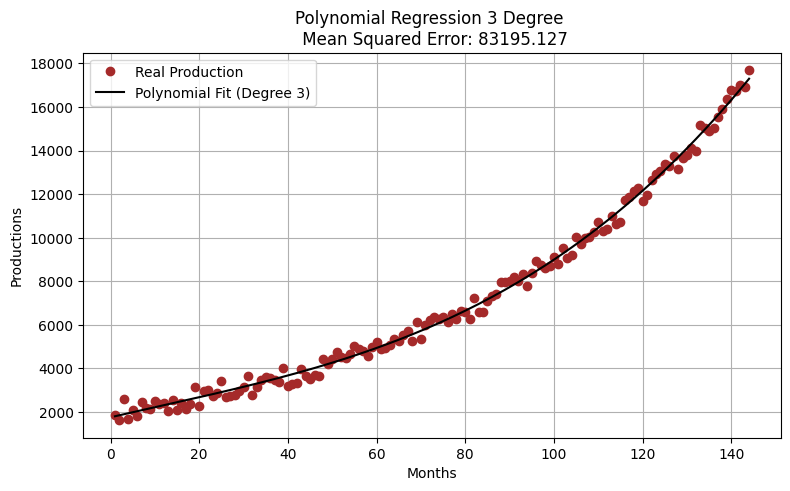

In [ ]:
degree = 3
poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
plt.figure(figsize = (9, 5))
plt.plot(data['Month'], data['Production'], 'o', label = 'Real Production', color = 'brown')
plt.plot(data['Month'], y_pred, '-', label = f'Polynomial Fit (Degree {degree})', color = 'black')
plt.title(f'Polynomial Regression {degree} Degree \n Mean Squared Error: {mse:.3f}')
plt.xlabel('Months')
plt.ylabel('Productions')
plt.legend()
plt.grid()
plt.show()

NOMOR 2

In [ ]:
coefficients = np.polyfit(data['Month'], data['Production'], degree)

for i, coef in enumerate(coefficients):
    print(f"Coefficient of x^{degree - i}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Coefficient of x^3: 0.004
Coefficient of x^2: -0.134
Coefficient of x^1: 47.224
Coefficient of x^0: 1748.507
Intercept: 1748.507

Mean Absolute Error (MAE): 245.304
Root Mean Squared Error (RMSE): 288.436
R² Score: 0.996


NOMOR 3

In [ ]:
def f(month):
    return np.polyval(coefficients, month) - 25000

def bisection_method(f, a, b, tol = 1e-5, iter = 1000):
    if f(a) * f(b) >= 0:
        raise ValueError("ERROR?!!")

    for _ in range(iter):
        c = (a + b) / 2.0
        if abs(f(c)) < tol or (b - a) / 2.0 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c

target_production = 25000
month_at_target = bisection_method(f, 144, 250)

if month_at_target:
    start_month = month_at_target - 13
    if start_month > 0:
        print(f"The production is expected to exceed {target_production} bags at approximately month {month_at_target:.3f}.")
        print(f"EIGER should start building a new warehouse by month {start_month:.3f}.")
    else:
        print(f"The production exceeds {target_production} bags before month 13, so construction should start immediately.")
else:
    print(f"Could not find a month where production reaches {target_production} within the specified interval and tolerance.")

The production is expected to exceed 25000 bags at approximately month 170.374.
EIGER should start building a new warehouse by month 157.374.


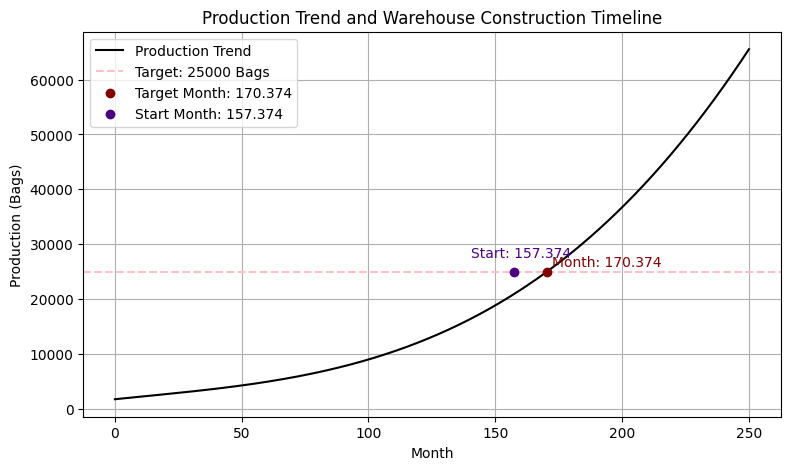

In [ ]:
# Visualization
months = np.linspace(0, 250, 500)
production = np.polyval(coefficients, months)

plt.figure(figsize=(9, 5))
plt.plot(months, production, label = "Production Trend", color = 'black')
plt.axhline(target_production, color = 'pink', linestyle = '--', label = f"Target: {target_production} Bags")
plt.scatter(month_at_target, target_production, color = 'maroon', zorder = 5, label = f"Target Month: {month_at_target:.3f}")
plt.text(month_at_target + 2, target_production + 1000, f"Month: {month_at_target:.3f}", color = 'maroon')

if start_month > 0:
    plt.scatter(start_month, target_production, color = 'indigo', zorder = 5, label = f"Start Month: {start_month:.3f}")
    plt.annotate(f"Start: {start_month:.3f}",
                 (start_month, target_production),
                 textcoords = "offset points",
                 xytext=(5, 10),
                 ha = 'center', color = 'indigo')

plt.title("Production Trend and Warehouse Construction Timeline")
plt.xlabel("Month")
plt.ylabel("Production (Bags)")
plt.legend()
plt.grid(True)
plt.show()